# 11 - ODEs with SciPy

The Runge-Kutta Order 4 approach we've been using is excellent for most applications.

However, there are additional steps we can take to improve our numerical solutions to ODE:

1. The step size, $h$, can be variable: make it small when the function is erratic, but make it large when it is smooth. 

2. Using some fancy mathematical methods, we can reduce the error even further than with the RK4 approach (with the same amount of computational effort).

## The package SciPy provides access to a powerful method for solving ODEs. 

The three ingredients *we provide* are the same as before:

1. A function describing the right hand side of our differential equation(s).

2. The initial values of our parameters.

3. A list of points for where we'd like to solve the equation(s). 

### Let's consider some of the same examples that we've looked at previously:

\begin{equation*}\frac{\mathrm{d}x}{\mathrm{d}t} = -x^3 + \mathrm{sin}(t) \end{equation*}

Starting at $x=0$ at $t=0$.

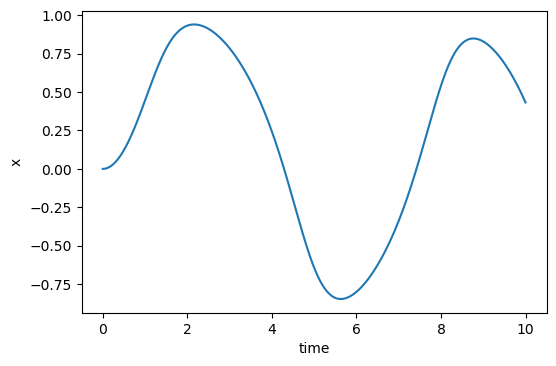

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# The function
def f(x,t):
    return -x**3 + np.sin(t)

# The initial conditions and time points
x0 = 0.0
tpoints = np.linspace(0,10,1000)

# Use SciPy for everything else!
xpoints = odeint(f,x0,tpoints)

# Make the figure
plt.figure(dpi=100)
plt.plot(tpoints,xpoints)
plt.xlabel('time')
plt.ylabel('x')
plt.show()



<br><br><br><br><br><br><br><br><br><br><br>

### If we have coupled ODEs, we modify our approach in exactly the same way as before.

Again, let's consider our old example:

\begin{equation*} \begin{aligned} \frac{\mathrm{d}x}{\mathrm{d}t} &= xy-x \\ \frac{\mathrm{d}y}{\mathrm{d}t} &= y-xy-\sin^2 \omega t \end{aligned} \end{equation*}

Plot these from $t=0$ to $t=10$ with $\omega = 1$ and $x=y=1$ at $t=0$.

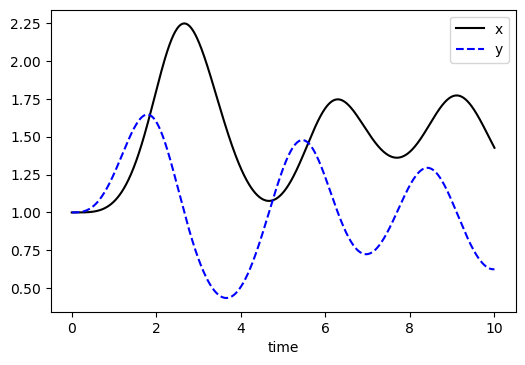

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function
def f(r,t,omega):
    x,y = r[0],r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(omega*t)**2
    return fx,fy

# Define the initial conditions and time points
r = [1.0,1.0]
tpoints = np.linspace(0,10,1000)
omega = 1.0

# And use odeint!
# note how we pass the extra arguments to the function f
rpoints = odeint(f,r,tpoints,args=(omega,))  

# rpoints is an array, so pull out xpoints and ypoints
xpoints = rpoints[:,0]
ypoints = rpoints[:,1]

# and make a figure
plt.figure(dpi=100)
plt.plot(tpoints,xpoints,'k-',label='x')
plt.plot(tpoints,ypoints,'b--',label='y')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br>

### As you probably guessed, second order ODEs also work in the same way!

Consider the simple pendulum at a large angle:

\begin{equation*} \frac{\textrm{d}^2\theta}{\mathrm{d}t^2} = -\frac gl \sin\theta \end{equation*}

Or:

\begin{equation*} \begin{aligned} \frac{\textrm{d}\theta}{\mathrm{d}t} &= \omega \\ 
 \frac{\textrm{d}\omega}{\mathrm{d}t} &=  -\frac gl \sin\theta \end{aligned} \end{equation*}

Initial conditions:

\begin{equation*} \begin{matrix} \frac{\textrm{d}\theta}{\mathrm{d}t} = 0 \frac{\text{rad}}{\text{sec}} & \theta = .99\pi \text{ rad} \end{matrix}\end{equation*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(r,t):
    g,L = 9.8,0.1
    theta,omega = r[0],r[1]
    f_theta = omega                          
    f_omega = -(g/L)*np.sin(theta)
    return f_theta,f_omega

r = [0.99*np.pi,0.0]
tpoints = np.linspace(0,3,1000)

rpoints = odeint(f,r,tpoints)
theta_points = rpoints[:,0]
omega_points = rpoints[:,1]

plt.figure(dpi=100)
plt.plot(tpoints,theta_points,'k-')
plt.xlabel('Time (s)')
plt.ylabel('Angular position (rad)')
plt.show()


<Figure size 640x480 with 1 Axes>

<br><br><br><br><br><br><br><br><br><br>

## Exercise 8.2: The Lotka-volterra equations (but using odeint from SciPy)

The Lotka--Volterra equations are a
mathematical model of predator--prey interactions between biological
species.  Let two variables $x$ and $y$ be proportional to the size of the
populations of two species, traditionally called ``rabbits'' (the prey) and ``foxes'' (the predators).  You could think of $x$ and $y$ as
being the population in thousands, say, so that $x=2$ means there are 2000
rabbits.  Strictly the only allowed values of $x$ and $y$ would then be
multiples of 0.001, since you can only have whole numbers of rabbits or
foxes.  But 0.001 is a pretty close spacing of values, so it's a decent
approximation to treat $x$ and $y$ as continuous real numbers so long as
neither gets very close to zero.

In the Lotka--Volterra model the rabbits reproduce at a rate proportional
to their population, but are eaten by the foxes at a rate proportional to
both their own population and the population of foxes:
\begin{equation*} \frac{\mathrm{d}x}{\mathrm{d}t} = Ax - Bxy \end{equation*} 
where $A$ and $B$ are constants.  At the same time the foxes
reproduce at a rate proportional the rate at which they eat
rabbits---because they need food to grow and reproduce---but also die of
old age at a rate proportional to their own population:
\begin{equation*} \frac{\mathrm{d}y}{\mathrm{d}t} = Cxy - Dy \end{equation*}
where $C$ and $D$ are also constants.

These equations say that: 

1. The prey species repopulates at a rate proportional to their population level ($A$).

2. The prey species dies at a rate propoportional to their population level and the population level of the predators ($B$). 

3. The predator species repopulates at a level proportional to both population levels ($C$). 

4. The predator species dies at a rate proportional to their population level ($D$).

Suppose $A=1$, $B=C=0.5$, $D=2$ and the initial population level for both species is 2.0 (this is all relative, so you can think of this in units of thousands, if you like).

a. Make a plot of $x$ vs. $t$ and a plot of $y$ vs. $t$ on the same plot. Separately, plot $y$ vs $x$.

b. Modify your program so you can plot multiple solutions on the $y$ vs $x$ plot. Try $A = 1.0, 1.5, 1.8, 2.1$.

c. Modify your program again to track the maximum population level of the predator species for each of the solutions you analyzed in question b. Make a scatter plot of maximum population level vs. $A$.

<br><br><br><br><br><br><br><br><br><br>

### Pre-written solution:


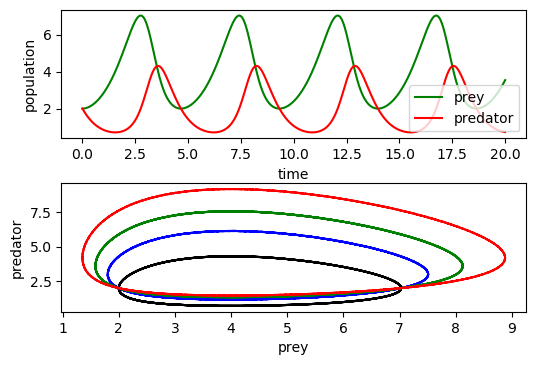

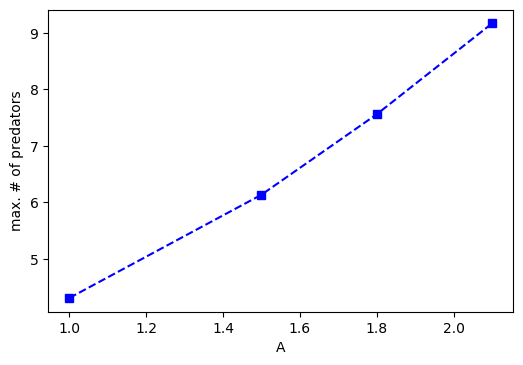

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(r,t,A):
    B = 0.5
    C = 0.5
    D = 2 
    x,y = r[0],r[1]
    fx = A*x - B*x*y 
    fy = C*x*y-D*y 
    return fx,fy

def perform_loop(A): 
    r = [2.0,2.0]
    rpoints = odeint(f,r,tpoints,args=(A,))  # note the syntax for a 1-tuple
    return rpoints[:,0],rpoints[:,1], max(rpoints[:,1])
    
tpoints = np.linspace(0,20,1000)
max_preds = []
    
plt.figure(dpi=100)  
plt.subplot(211)
trial1_prey, trial1_pred, max_pred = perform_loop(1)  
max_preds.append(max_pred)
plt.plot(tpoints,trial1_prey,'g-',label='prey')  
plt.plot(tpoints,trial1_pred,'r-',label='predator')
plt.xlabel('time')
plt.ylabel('population')
plt.legend(loc='lower right')

plt.subplot(212)
trial2_prey, trial2_pred, max_pred = perform_loop(1.5)
max_preds.append(max_pred)
trial3_prey, trial3_pred, max_pred = perform_loop(1.8)
max_preds.append(max_pred)
trial4_prey, trial4_pred, max_pred = perform_loop(2.1)
max_preds.append(max_pred)
plt.plot(trial1_prey,trial1_pred,'k')
plt.plot(trial2_prey,trial2_pred,'b--')
plt.plot(trial3_prey,trial3_pred,'g-.')
plt.plot(trial4_prey,trial4_pred,'r:')

plt.xlabel('prey')
plt.ylabel('predator')  
plt.subplots_adjust(hspace=0.35)

plt.figure(dpi=100)
plt.plot([1.0,1.5,1.8,2.1],max_preds,'bs--')
plt.xlabel('A')
plt.ylabel('max. # of predators')
plt.show()